#Numerical Solutions for DEs HW1

YANG, Ze (5131209043)

**Note to TA**: Hi, this is the senior student from Antai College who did not register for this course. I would like to do all the assignments for practice, but feel free to just skip my homework if you don't have time.

Thank you again for allowing me to access the assignments and other class material! : )

Ze



##Figure 1-2: Error of Euler and Trapezoid Method - A Good Example


In [29]:
%matplotlib inline
from __future__ import division
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

f_1 = lambda t,y: -y + 2*np.exp(-t)*np.cos(2*t)
g_1 = lambda t,y,h: (y + (h/2)*f_1(t,y) + h*np.exp(-(t+h))*np.cos(2*(t+h))) / (1 + (h/2))
y_exact = lambda t: np.exp(-t)*np.sin(2*t)

def explicit_euler_solve(f, n, t0, t1, y0):
    """
    explicit euler method, solve IVP y'(t)=f(t,y(t)), y(t_0)=y_0 by
    y_{n+1} <- y_{n} + hf(t_n, y_{n}).
    @param f: a function of t and y, which is the derivative of y.
    @param n: the number of steps.
    @param t0, y0: the initial value.
    @param t1: the other end to which we generate numerical solution
    
    @return t: the np.array {t_k}_1^n
    @return y: the np.array {y_k}_1^n
    """
    h = (t1 - t0) / n
    t, y = np.linspace(t0, t1, n+1), np.zeros(n+1)
    y[0] = y0
    for k in range(n):
        y[k+1] = y[k] + h*f(t[k], y[k])
    return t, y

def trapezoid_solve(g, n, t0, t1, y0):
    """
    trapezoid method, solve IVP y'(t)=f(t,y(t)), y(0)=y_0 by
    y_{n+1} <- y_{n} + h/2(f(t_n, y_{n}) + f(t_{n+1}, y_{n+1})).
    y_{n+1} <- g(y_{n}, n, h)
    @param g: a function of t_n, y_n, h; the rule of updating
    @param n: the number of steps.
    @param t0, y0: the initial value.
    @param t1: the other end to which we generate numerical solution
    
    @return t_path: the array {t_k}_1^n
    @return path: the array {y_k}_1^n
    """
    implicit = lambda y_new, y_old, k : (
        y_new - y_old - (h/2) * (f(k*h, y_old) + f((k+1)*h, y_new))
    )
    h = (t1 - t0) / n
    t, y = np.linspace(t0, t1, n+1), np.zeros(n+1)
    y[0] = y0
    for k in range(n):
        y[k+1] = g(t[k], y[k], h)
    return t, y

def error(y, result, h):
    """
    calcuate the error e_n = y_n - y(t_n)
    @param y: the exact solution y(t).
    @param result: the result of numerical calculation.
    @param h: the step size.
    """
    n = len(result)
    err = []
    for k in range(1,n+1):
        err.append(result[k-1] - y(k*h))
    return err
    

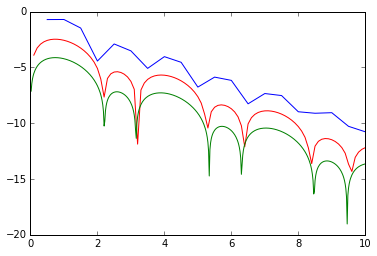

In [18]:
if __name__ == '__main__':
    T = 10
    h_1 = 1/2
    t1, y1 = explicit_euler_solve(f_1, 20, 0, T, 0)
    err_1 = error_(y_exact, y1, t1)
    
    h_2 = 1/10
    t2, y2 = explicit_euler_solve(f_1, 100, 0, T, 0)
    err_2 = error_(y_exact, y2, t2)
    
    h_3 = 1/50
    t3, y3 = explicit_euler_solve(f_1, 500, 0, T, 0)
    err_3 = error_(y_exact, y3, t3)
    
    plt.plot(t_path_11[1::], np.log(np.abs(err_1[1::])))
    plt.plot(t_path_12[1::], np.log(np.abs(err_2[1::])), 'r')
    plt.plot(t_path_13[1::], np.log(np.abs(err_3[1::])), 'g')

In [30]:
if __name__ == '__main__':
    T = 10
    h_1 = 1/2
    t1, y1 = trapezoid_solve(g_1, 20, 0, T, 0)
    err_1 = error_(y_exact, y1, t1)
    
    h_2 = 1/10
    t2, y2 = trapezoid_solve(g_1, 100, 0, T, 0)
    err_2 = error_(y_exact, y2, t2)
    
    h_3 = 1/50
    t3, y3 = trapezoid_solve(g_1, 500, 0, T, 0)
    err_3 = error_(y_exact, y3, t3)

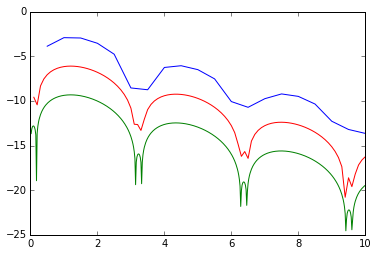

In [32]:
plt.plot(t1[1::], np.log(np.abs(err_1[1::])))
plt.plot(t2[1::], np.log(np.abs(err_2[1::])), 'r')
plt.plot(t3[1::], np.log(np.abs(err_3[1::])), 'g')

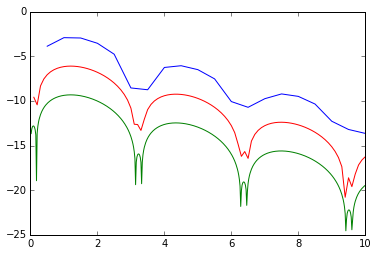

In [12]:
plt.plot(t_path_21, np.log(np.abs(err_21)))
plt.plot(t_path_22, np.log(np.abs(err_22)), 'r')
plt.plot(t_path_23, np.log(np.abs(err_23)), 'g')

##Figure 1-3: Error of Euler Method - A Bad Example

In [24]:
f_2 = lambda t,y: np.log(3)*(y - np.floor(y) - (3/2))
y_exact_2 = lambda t: -np.floor(t) + 0.5*(1-np.power(3,t-np.floor(t)))

if __name__ == '__main__':
    T = 8
    h_1 = 1/100
    t1, y1 = explicit_euler_solve(f_2, int(T/h_1), 0, T, 0)
    err_1 = error_(y_exact_2, y1, t1)
    
    h_2 = 1/1000
    t2, y2 = explicit_euler_solve(f_2, int(T/h_2), 0, T, 0)
    err_2 = error_(y_exact_2, y2, t2)

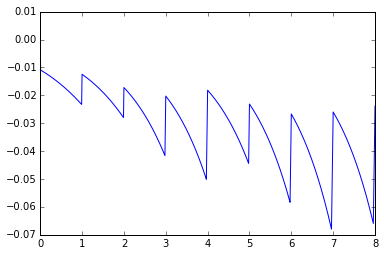

In [22]:
plt.plot(t1, err_1)

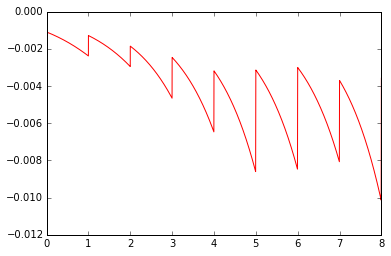

In [26]:
plt.plot(t2, err_2, 'r')